In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
!ls

sample_data  Social_Network_Ads.csv


In [21]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [22]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


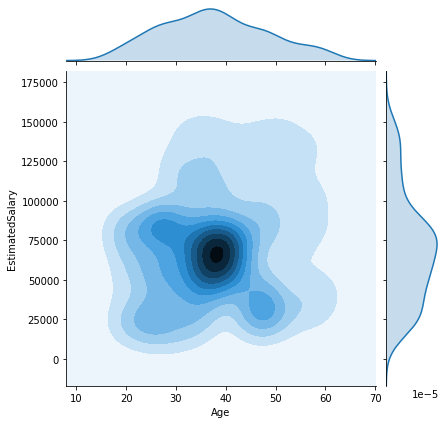

In [23]:
import seaborn as sns
sns.jointplot(x='Age', y='EstimatedSalary', data=dataset, kind='kde')

In [24]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier  = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
prediction = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[56  9]
 [ 8 27]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        65
           1       0.75      0.77      0.76        35

    accuracy                           0.83       100
   macro avg       0.81      0.82      0.81       100
weighted avg       0.83      0.83      0.83       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


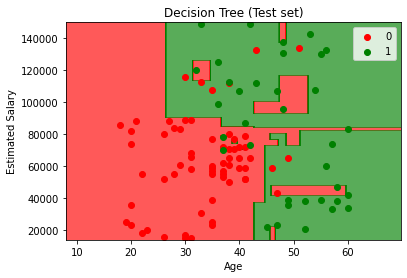

<Figure size 1440x720 with 0 Axes>

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.65, cmap = ListedColormap(('red', 'green')), )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j, )
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.figure(figsize=(20,10))
plt.show()

In [31]:
 from google.colab import files 
 data = files.upload()

Saving kyphosis.csv to kyphosis.csv


In [32]:
!ls

kyphosis.csv  sample_data  Social_Network_Ads.csv


In [33]:
dataset  =pd.read_csv('kyphosis.csv')

In [35]:
dataset.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


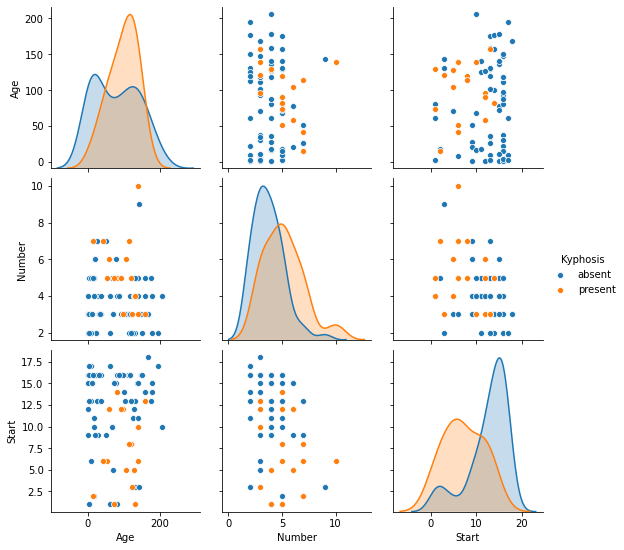

In [36]:
sns.pairplot(dataset, hue='Kyphosis')

In [37]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [38]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
classifier = DecisionTreeClassifier()

In [41]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
prediction = classifier.predict(X_test)

In [43]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[14  1]
 [ 2  4]]
              precision    recall  f1-score   support

      absent       0.88      0.93      0.90        15
     present       0.80      0.67      0.73         6

    accuracy                           0.86        21
   macro avg       0.84      0.80      0.82        21
weighted avg       0.85      0.86      0.85        21

